 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [212]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [279]:
# Reading whale returns
Whale_Returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
Whale_Returns.sort_index()
Whale_Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [214]:
# Count nulls
Whale_Returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [215]:
# Drop nulls
Whale_Returns.dropna(inplace=True)

In [216]:
Whale_Returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [257]:
# Reading algorithmic returns
Algo_Returns = pd.read_csv("algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
Algo_Returns.sort_index(ascending=True)
Algo_Returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [258]:
# Count nulls
Algo_Returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [259]:
# Drop nulls
Algo_Returns.dropna(inplace=True)

In [260]:
Algo_Returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [326]:
# Reading S&P 500 Closing Prices
SP500_Returns= pd.read_csv("sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500_Returns.sort_index(inplace=True)
SP500_Returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [222]:
# Check Data Types
SP500_Returns.dtypes

Close    object
dtype: object

In [223]:
# Fix Data Types
SP500_Returns['Close'] = SP500_Returns['Close'].replace(r'[$,]','',regex=True).astype('float64')
SP500_Returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [224]:
# Calculate Daily Returns
SP500_Returns = SP500_Returns.pct_change()
SP500_Returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [225]:
# Drop nulls
SP500_Returns.dropna(inplace=True)

In [226]:
SP500_Returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [227]:
# Rename `Close` Column to be specific to this portfolio.
SP500_Returns.columns=['SP 500']
SP500_Returns.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [228]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_Portfolio_Returns = pd.concat([Whale_Returns, Algo_Returns, SP500_Returns], axis='columns', join='inner')
Combined_Portfolio_Returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

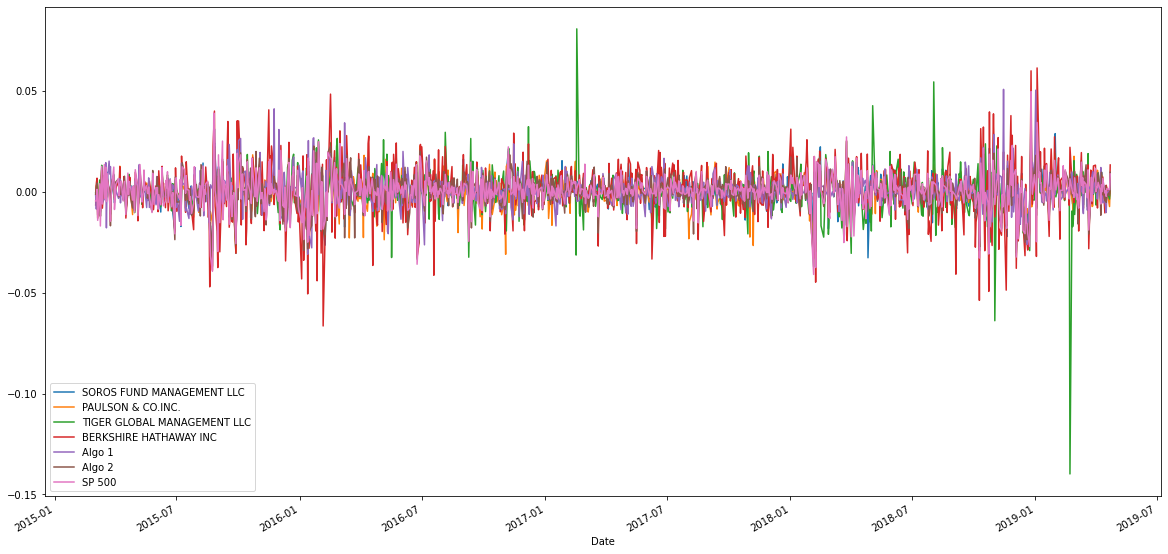

In [229]:
# Plot daily returns of all portfolios
Combined_Portfolio_Returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

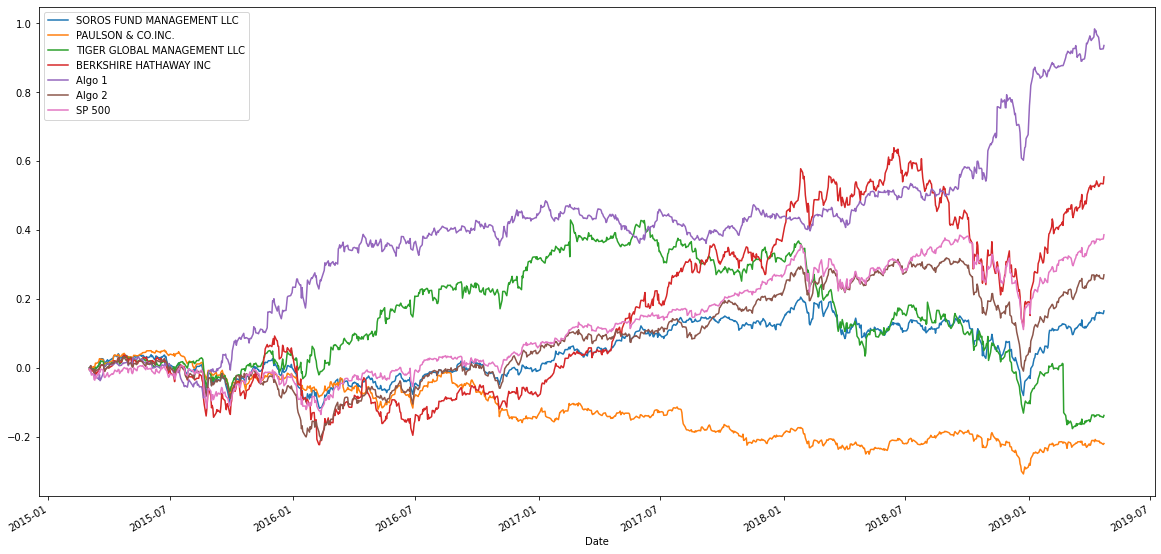

In [230]:
# Calculate cumulative returns of all portfolios
Cumulative_Returns = (1 + Combined_Portfolio_Returns.sort_index()).cumprod()-1
# Plot cumulative returns
Cumulative_Returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

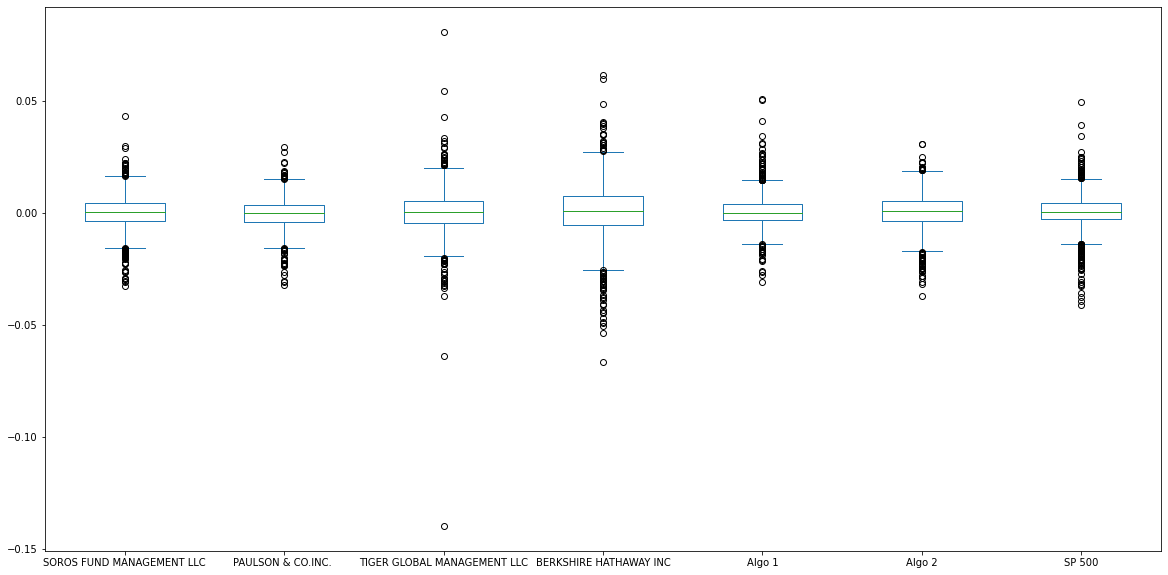

In [231]:
# Box plot to visually show risk
Combined_Portfolio_Returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [232]:
# Calculate the daily standard deviations of all portfolios
Combined_Portfolios_std = Combined_Portfolio_Returns.std()
Combined_Portfolios_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [233]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
Combined_Portfolios_std[(Combined_Portfolios_std["SP 500"] < Combined_Portfolios_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [234]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_std = Combined_Portfolios_std * np.sqrt(252)
Annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

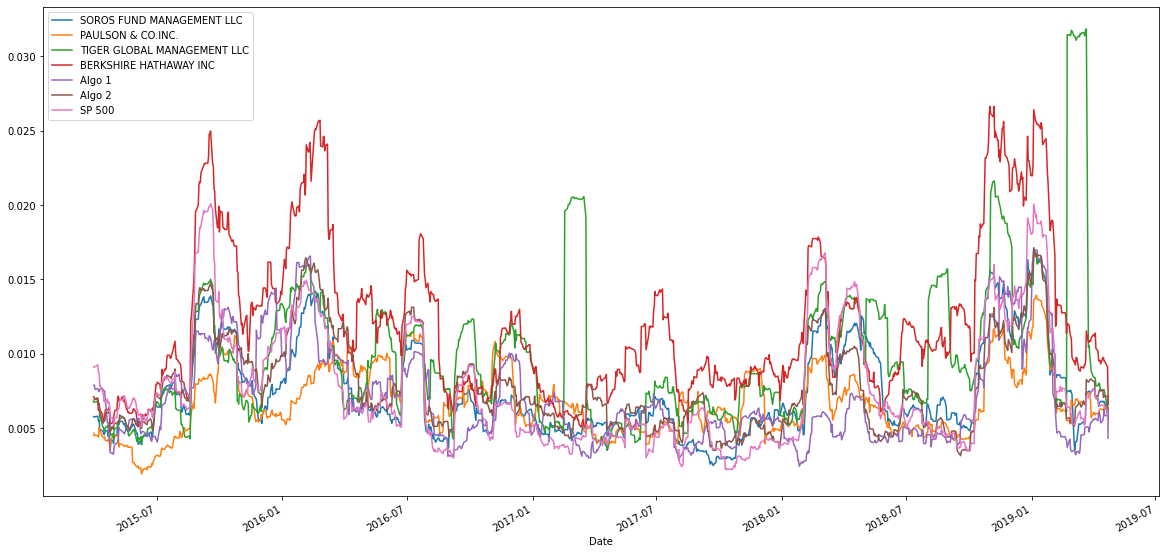

In [235]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
Combined_Portfolio_Returns.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

In [236]:
# Calculate the correlation
# Display de correlation matrix
Combined_Portfolio_Returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

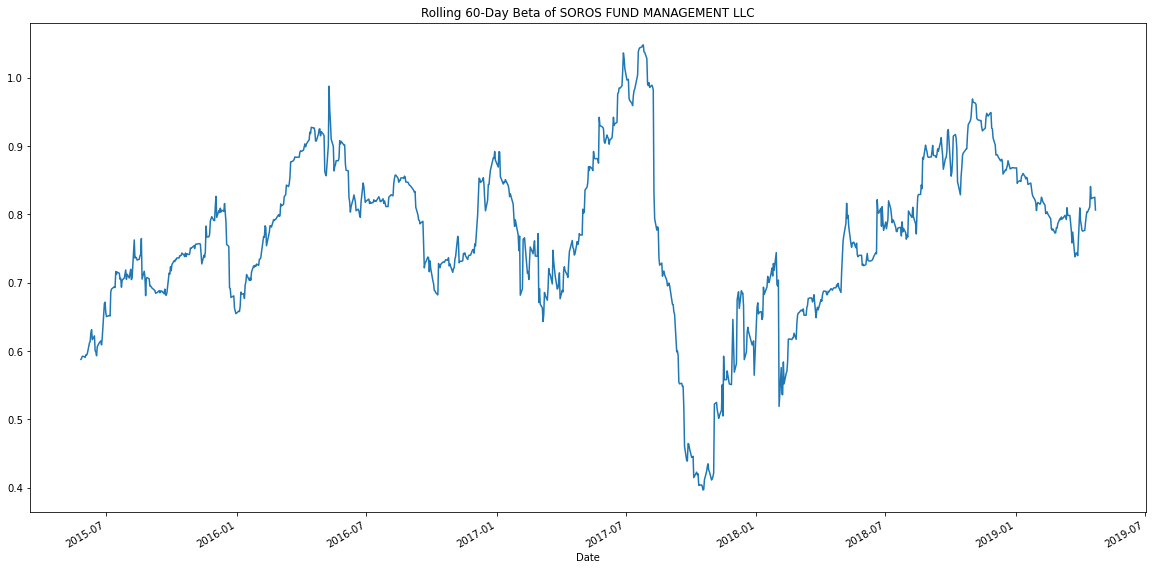

In [237]:
# Calculate covariance of a single portfolio
Covariance_SFM = Combined_Portfolio_Returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(Combined_Portfolio_Returns["SP 500"])
# Calculate variance of S&P 500
Variance_SP500 = Combined_Portfolio_Returns['SP 500'].rolling(window=60).var()
# Computing beta
Rolling_Beta_SFM = Covariance_SFM/Variance_SP500
# Plot beta trend
Rolling_Beta_SFM.plot(figsize=(20, 10), title="Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [327]:
# Use `ewm` to calculate the rolling window
Combined_Portfolio_Returns.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [239]:
# Annualized Sharpe Ratios
Sharpe_Ratios = (Combined_Portfolio_Returns.mean() * 252) / (Combined_Portfolio_Returns.std() * np.sqrt(252))
Sharpe_Ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

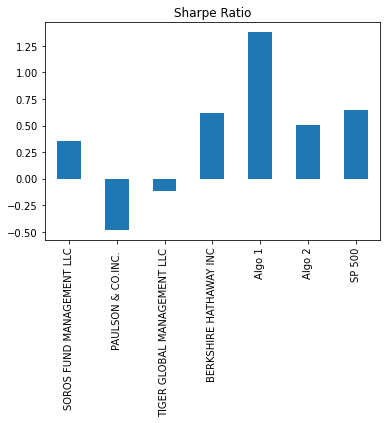

In [240]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratios.plot(kind='bar', title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [291]:
# Reading data from 1st stock
GOOG_df = pd.read_csv("GOOG_HW2.csv")
GOOG_df = pd.read_csv("GOOG_HW2.csv", index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=["Date","Close"])
GOOG_df

,Close
Date,
2018-04-02,1006.469971
2018-04-03,1013.409973
2018-04-04,1025.140015
2018-04-05,1027.810059
2018-04-06,1007.039978
...,...
2019-03-25,1193.000000
2019-03-26,1184.619995
2019-03-27,1173.020020


In [292]:
# Reading data from 2nd stock
AAPL_df = pd.read_csv("AAPL_HW2.csv")
AAPL_df = pd.read_csv("AAPL_HW2.csv", index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=["Date","Close"])
AAPL_df

,Close
Date,
2018-04-02,41.669998
2018-04-03,42.097500
2018-04-04,42.902500
2018-04-05,43.200001
2018-04-06,42.095001
...,...
2019-03-25,47.185001
2019-03-26,46.697498
2019-03-27,47.117500


In [293]:
# Reading data from 3rd stock
COST_df = pd.read_csv("COST_HW2.csv")
COST_df = pd.read_csv("COST_HW2.csv", index_col="Date", infer_datetime_format=True,  parse_dates=True, usecols=["Date","Close"])
COST_df

,Close
Date,
2018-04-02,182.750000
2018-04-03,182.610001
2018-04-04,185.520004
2018-04-05,186.250000
2018-04-06,183.960007
...,...
2019-03-25,236.970001
2019-03-26,239.070007
2019-03-27,239.410004


In [294]:
# Combine all stocks in a single DataFrame
My_Portfolio = pd.concat([GOOG_df, AAPL_df, COST_df], axis='columns', join='inner')
My_Portfolio.columns = ["GOOG", "AAPL", "COST"]
My_Portfolio_Return = My_Portfolio.sort_index().pct_change() 
My_Portfolio_Return.head()

,GOOG,AAPL,COST
Date,,,
2018-04-02,NaN,NaN,NaN
2018-04-03,0.006895,0.010259,-0.000766
2018-04-04,0.011575,0.019122,0.015936
2018-04-05,0.002605,0.006934,0.003935
2018-04-06,-0.020208,-0.025579,-0.012295


In [295]:
# Reset Date index
My_Portfolio_Return = My_Portfolio.sort_index().pct_change() 
My_Portfolio_Return.head()

,GOOG,AAPL,COST
Date,,,
2018-04-02,NaN,NaN,NaN
2018-04-03,0.006895,0.010259,-0.000766
2018-04-04,0.011575,0.019122,0.015936
2018-04-05,0.002605,0.006934,0.003935
2018-04-06,-0.020208,-0.025579,-0.012295


In [328]:
# Reorganize portfolio data by having a column per symbol
My_Portfolio.columns 

Index(['GOOG', 'AAPL', 'COST'], dtype='object')

In [296]:
# Calculate daily returns
#My_Portfolio_Return = My_Portfolio.sort_index().pct_change()
# Drop NAs
My_Portfolio_Return.dropna(inplace=True)
# Display sample data
My_Portfolio_Return.head()

,GOOG,AAPL,COST
Date,,,
2018-04-03,0.006895,0.010259,-0.000766
2018-04-04,0.011575,0.019122,0.015936
2018-04-05,0.002605,0.006934,0.003935
2018-04-06,-0.020208,-0.025579,-0.012295
2018-04-09,0.008351,0.009918,0.002446


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [329]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
Weighted_Portfolio = My_Portfolio_Return.dot(weights)
# Display sample data
Weighted_Portfolio

Date
2018-04-03    0.005463
2018-04-04    0.015544
2018-04-05    0.004491
2018-04-06   -0.019361
2018-04-09    0.006905
                ...   
2019-03-25   -0.008315
2019-03-26   -0.002831
2019-03-27    0.000208
2019-03-28    0.001675
2019-03-29    0.004819
Length: 250, dtype: float64

In [330]:
Weighted_Portfolio.sum()

0.22240633784652344

In [331]:
Total_Returns = (1 + Weighted_Portfolio).cumprod()-1
Total_Returns.sum()

36.51500428659837

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [303]:
# Join your returns DataFrame to the original returns DataFrame
Portfolio_Return = pd.concat([Weighted_Portfolio, Combined_Portfolio_Returns], axis='columns', join='inner')
Portfolio_Return.rename(columns={0:"MY PORTFOLIO"}, inplace=True)
Portfolio_Return.sort_index()
Portfolio_Return

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2018-04-03,0.005463,0.005025,0.006823,0.006223,0.008499,-0.005030,0.005674,0.012615
2018-04-04,0.015544,0.014781,0.003621,0.015294,0.006018,0.014715,0.009249,0.011566
2018-04-05,0.004491,0.011386,0.003220,0.001333,0.005187,0.000218,0.004818,0.006863
2018-04-06,-0.019361,-0.015901,-0.011251,-0.014487,-0.014856,-0.009878,-0.011514,-0.021920
2018-04-09,0.006905,0.000776,0.002365,0.001869,0.000780,0.004021,-0.001483,0.003337
...,...,...,...,...,...,...,...,...
2019-03-25,-0.008315,-0.003330,-0.000420,0.000972,0.010737,0.000973,-0.002058,-0.000839
2019-03-26,-0.002831,0.004387,0.005641,0.009190,0.005378,0.005455,0.005614,0.007183
2019-03-27,0.000208,-0.003994,-0.007321,-0.004278,-0.006041,0.008395,-0.004457,-0.004644


In [306]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Portfolio_Return.dropna(inplace=True)
Portfolio_Return

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2018-04-03,0.005463,0.005025,0.006823,0.006223,0.008499,-0.005030,0.005674,0.012615
2018-04-04,0.015544,0.014781,0.003621,0.015294,0.006018,0.014715,0.009249,0.011566
2018-04-05,0.004491,0.011386,0.003220,0.001333,0.005187,0.000218,0.004818,0.006863
2018-04-06,-0.019361,-0.015901,-0.011251,-0.014487,-0.014856,-0.009878,-0.011514,-0.021920
2018-04-09,0.006905,0.000776,0.002365,0.001869,0.000780,0.004021,-0.001483,0.003337
...,...,...,...,...,...,...,...,...
2019-03-25,-0.008315,-0.003330,-0.000420,0.000972,0.010737,0.000973,-0.002058,-0.000839
2019-03-26,-0.002831,0.004387,0.005641,0.009190,0.005378,0.005455,0.005614,0.007183
2019-03-27,0.000208,-0.003994,-0.007321,-0.004278,-0.006041,0.008395,-0.004457,-0.004644


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [307]:
# Calculate the annualized `std`
Annual_Portfolio_std = Portfolio_Return.std() * np.sqrt(252)
Annual_Portfolio_std

MY PORTFOLIO                   0.213394
SOROS FUND MANAGEMENT LLC      0.152009
PAULSON & CO.INC.              0.117465
TIGER GLOBAL MANAGEMENT LLC    0.234933
BERKSHIRE HATHAWAY INC         0.243489
Algo 1                         0.131530
Algo 2                         0.137466
SP 500                         0.154480
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [313]:
# Calculate rolling standard deviation
Portfolio_Return.rolling(window=21).std().tail()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,,
2019-03-25,0.009841,0.007426,0.007234,0.010434,0.010769,0.005056,0.008082,0.007021
2019-03-26,0.009955,0.007488,0.007316,0.010535,0.010769,0.004727,0.008152,0.007186
2019-03-27,0.009983,0.007421,0.007370,0.009882,0.010868,0.004947,0.008210,0.007267
2019-03-28,0.009986,0.007404,0.006893,0.009427,0.010825,0.005372,0.008286,0.007301
2019-03-29,0.009930,0.007406,0.005685,0.008814,0.011029,0.005343,0.008276,0.007386


<AxesSubplot:xlabel='Date'>

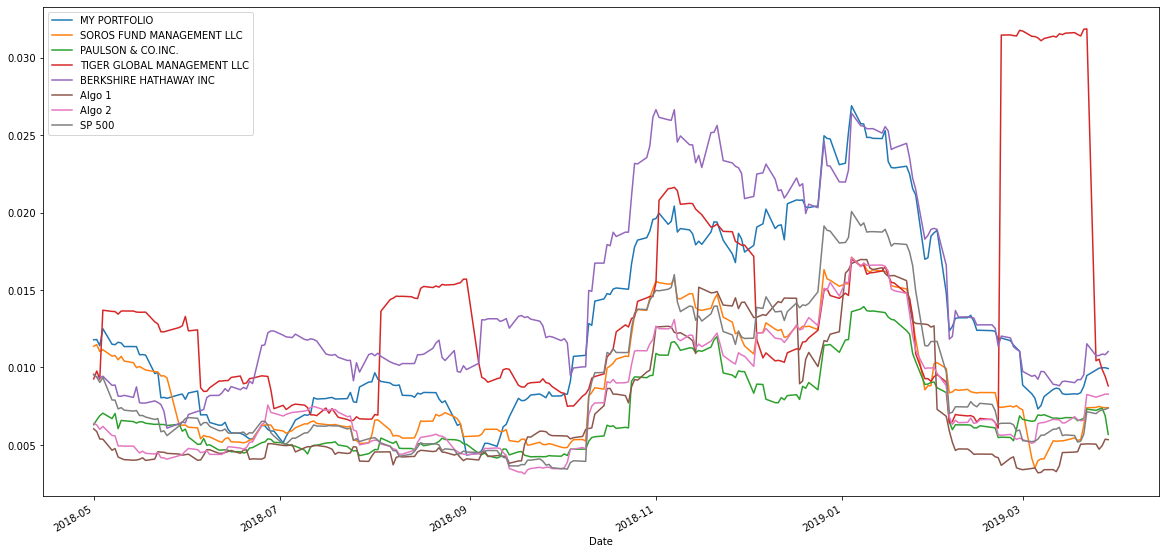

In [312]:
# Plot rolling standard deviation
Portfolio_Return.rolling(window=21).std().plot(figsize=[20,10])

### Calculate and plot the correlation

In [316]:
# Calculate and plot the correlation
Correlation = Portfolio_Return.corr()
Correlation

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
MY PORTFOLIO,1.000000,0.729143,0.639686,0.411808,0.797852,0.269234,0.747783,0.870552
SOROS FUND MANAGEMENT LLC,0.729143,1.000000,0.766864,0.474402,0.793766,0.340872,0.831772,0.851082
PAULSON & CO.INC.,0.639686,0.766864,1.000000,0.490896,0.653493,0.361427,0.780069,0.777126
TIGER GLOBAL MANAGEMENT LLC,0.411808,0.474402,0.490896,1.000000,0.334642,0.125939,0.420669,0.499125
BERKSHIRE HATHAWAY INC,0.797852,0.793766,0.653493,0.334642,1.000000,0.328818,0.787315,0.844026
Algo 1,0.269234,0.340872,0.361427,0.125939,0.328818,1.000000,0.378580,0.294118
Algo 2,0.747783,0.831772,0.780069,0.420669,0.787315,0.378580,1.000000,0.875934
SP 500,0.870552,0.851082,0.777126,0.499125,0.844026,0.294118,0.875934,1.000000


<AxesSubplot:xlabel='SP 500', ylabel='MY PORTFOLIO'>

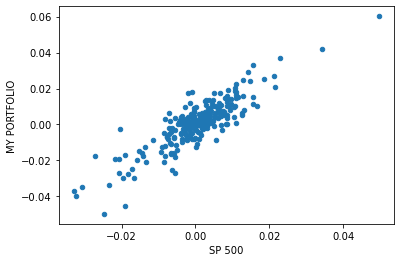

In [325]:
Portfolio_Return.plot(kind="scatter", x="SP 500", y="MY PORTFOLIO")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta for My Portfolio compared to the S&P 500'}, xlabel='Date'>

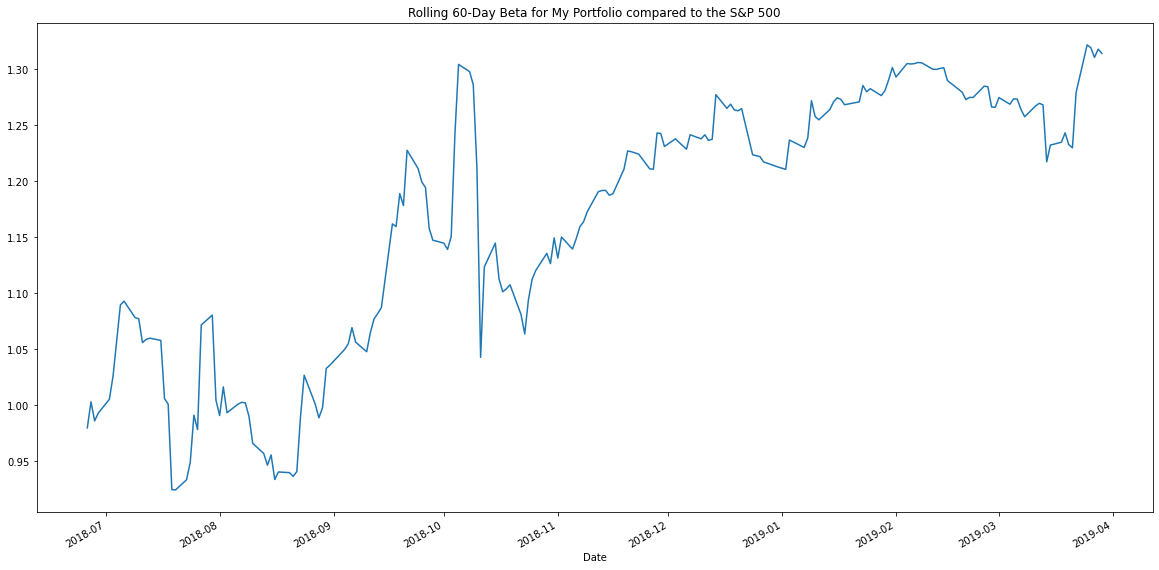

In [322]:
# Calculate and plot Beta
Covariance_Portfolio = Portfolio_Return["MY PORTFOLIO"].rolling(window=60).cov(Combined_Portfolio_Returns["SP 500"])
Variance_Portfolio = Portfolio_Return['SP 500'].rolling(window=60).var()
Rolling_Beta_Portfolio = Covariance_Portfolio/Variance_Portfolio
Rolling_Beta_Portfolio.plot(figsize=(20, 10), title="Rolling 60-Day Beta for My Portfolio compared to the S&P 500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [323]:
# Calculate Annualzied Sharpe Ratios
Annual_Portfolio_Sharpe_Ratio = (Portfolio_Return.mean() * 252)/(Portfolio_Return.std() * np.sqrt(252))
Annual_Portfolio_Sharpe_Ratio

MY PORTFOLIO                   1.050570
SOROS FUND MANAGEMENT LLC      0.292555
PAULSON & CO.INC.              0.162520
TIGER GLOBAL MANAGEMENT LLC   -1.027219
BERKSHIRE HATHAWAY INC         0.226277
Algo 1                         2.489974
Algo 2                         0.223751
SP 500                         0.685943
dtype: float64

<AxesSubplot:>

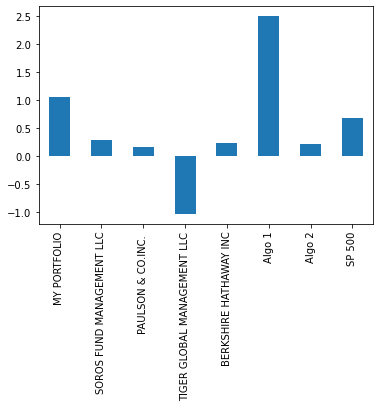

In [324]:
# Visualize the sharpe ratios as a bar plot
Annual_Portfolio_Sharpe_Ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

# Conclusion
Looking at my portfolio and the overall financial analysis, my conclusion is as follows:

* My portfolio is riskier than the S&P 500 but still less risky than the TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC portfolios. This can be found by looking at the standard deviation which measures risk.

* The Sharpe ratio shows that my portfolio will give a higher return per unit of risk compared to most of the other portfolios, with the exception of the Algo 1 portfolio, as it is higher than 1.  

* My portfolio has a strong correlation with the S&P 500 which is 0.870552. This can prove to be risky but as the Sharpe ratio shows above, the return compensates the investor for assuming this risk.

* The beta shows that my portfolio is more volatile than the S&P 500 but similar to the strong correlation, the return we see in the Sharpe ratio shows that the investor is compensated for assuming this risk.

Overall, my portfolio could probably be more diverse as this would lower the correlation and risk associated with choosing it but nevertheless, an investor would not be disappointed if they chose it because the return more than compensates for the risk assumed. Therefore, I would say that my portfolio did great!